# **Introduction**
Data menjelaskan mengenai 2 dataset dengan hotel demand masing-masing. Kedua hotel berlokasi di Portugal. Hotel
pertama (H1) adalah Resort Hotel yang berlokasi di daerah Algarve sedangkan hotel kedua (H2) adalah City Hotel yang berlokasi di kota Lisbon.\
Kedua dataset memiliki struktur yang sama yaitu 31 variabel yang menggambarkan 40.060 pengamatan Resort Hotel dan 79.330 pengamatan City Hotel. Setiap pengamatan mewakili pemesanan hotel.  
Kedua set data terdiri dari pemesanan yang akan tiba antara 1 Juli 2015 dan 31 Agustus 2017. \
Melalui dataset ini diharapkan dapat memberikan insight baru untuk penelitian pendidikan dalam manajemen pendapatan, pembelajaran mesin, dan pengembangan data.








# **Problem Statement**

Berdasarkan dataset yang diperoleh, ada beberapa permasalahan yang akan dipecahkan, yaitu: \
**Problem Statement for Machine Learning** :
1. Bagaimana cara memprediksi apakah customer akan cancel booking atau tidak sehingga kita dapat memikirkan solusi untuk meminimalisir cancel booking?

**Problem Statement for Analytics** :
1. Apa saja variabel yang memengaruhi customer akan membatalkan booking atau tidak?
2. Berapa besar persentase variabel tersebut terhadap keputusan customer membatalkan booking?
3. Customer seperti apa yang harus kita treat agar tidak membatalkan booking?



# Library
Berikut ini merupakan library yang akan dipakai pada keseluruhan proses yang ada, dimulai dari exploratory data analysis hingga pembuatan machine learning.

In [824]:
pip install category_encoders

In [825]:
pip install plot_confusion_matrix

ERROR: Could not find a version that satisfies the requirement plot_confusion_matrix (from versions: none)
ERROR: No matching distribution found for plot_confusion_matrix


In [826]:
import pandas as pd
import numpy as np
import category_encoders as ce

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix

# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from scipy.stats import chi2_contingency

# modeling
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Understanding Data

Tahapan awal dari keseluruhan proses adalah mempelajari lebih detail mengenai dataset yang kita miliki. Untuk itu, kita harus tipe data serta kolom-kolom apa saja yang ada pada dataset.

**Data Import** 

Mari kita melakukan import data ke dalam variabel df.

In [827]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [829]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 1. Hotel
Variabel Hotel merupakan jenis hotel yang dilihat. Jenis hotel terdapat 2 jenis yaitu Resort Hotel dan City Hotel. Pada plot dibawah ini, mencari tahu berapa banyak jumlah customer yang menginap di Resort Hotel dan City Hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



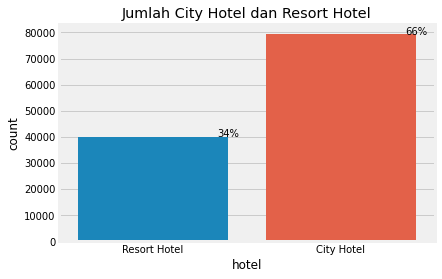

In [830]:
plt.title("Jumlah City Hotel dan Resort Hotel")
ax = sns.countplot(df['hotel'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 2. is_canceled
Variabel ini merupakan jenis variabel yang memberi tahu apakah customer membatalkan bookingan atau tidak. Nilai 0 berarti tidak membatalkan dan 1 berarti membatalkan. Dari plot dibawah ini menandakan bahwa sekitar 63 % tidak membatalkan bookingan, dan 37 % membatalkan bookingan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



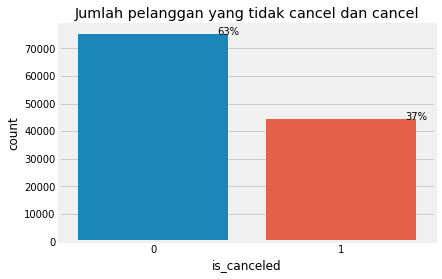

In [831]:
plt.title("Jumlah pelanggan yang tidak cancel dan cancel")
ax = sns.countplot(df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 3. arrival_date_year
Variabel arrival_date_year menandakan tahun kedatangan customer. Pada plot dibawah ini menunjukkan jumlah kedatangan customer pada tahun 2015 -2017

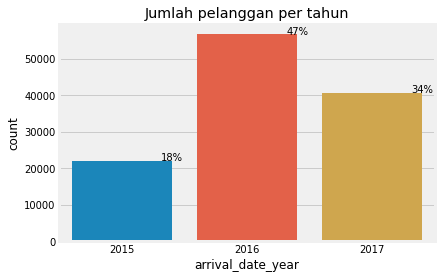

In [832]:
plt.title("Jumlah pelanggan per tahun")
ax = sns.countplot(x=df['arrival_date_year'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 4. arrival_date_month
Variabel arrival_date_year menandakan tahun kedatangan customer. Pada plot dibawah ini menunjukkan jumlah kedatangan customer pada bulan Januari - Desember

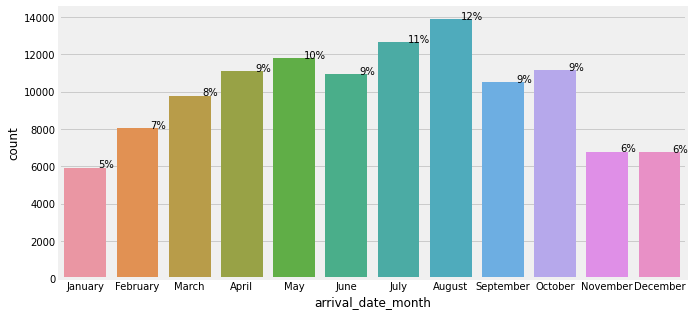

In [833]:
plt.figure(figsize=(10,5))
month_order = ['January','February','March','April','May', 'June','July','August','September','October','November','December']
ax= sns.countplot(x=df['arrival_date_month'], order = month_order)
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 5. arrival_date_week_number
Variabel arrival_date_week_number menandakan minggu kedatangan customer dalam satu tahun. Pada plot dibawah ini menunjukkan jumlah kedatangan customer pada minggu 1- 53

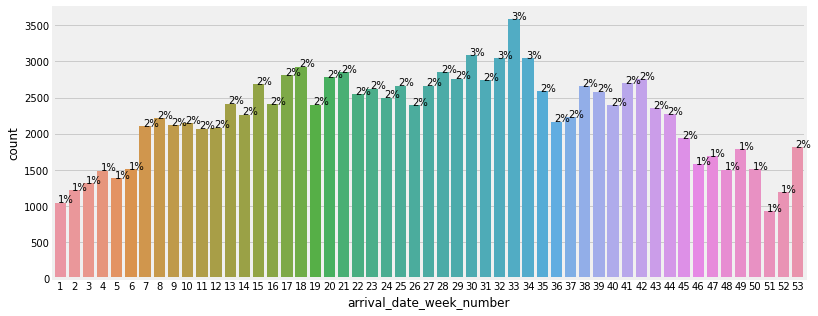

In [834]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['arrival_date_week_number'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 6. arrival_date_day_of_month
Variabel arrival_date_day_of_month menandakan minggu kedatangan customer dalam satu tahun. Pada plot dibawah ini menunjukkan tanggal kedatangan dalam satu bulan

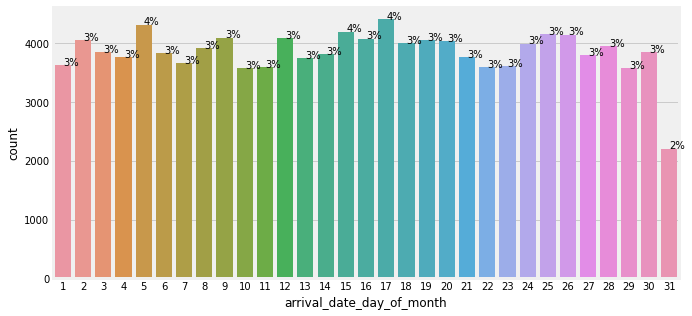

In [835]:
plt.figure(figsize=(10,5))
ax =sns.countplot(x=df['arrival_date_day_of_month'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 7. stays_in_weekend_nights
Variabel stays_in_weekend_nights berisi lama hari penginapan pada akhir minggu.

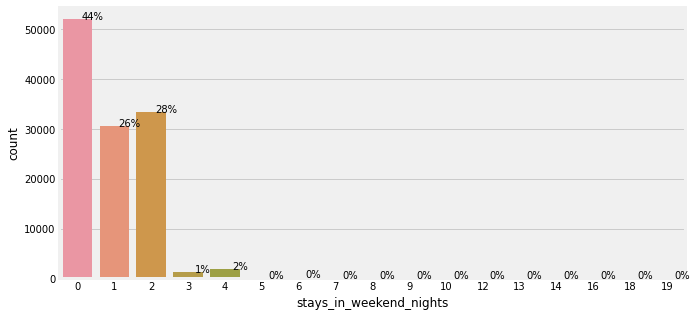

In [836]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['stays_in_weekend_nights'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 8. stays_in_weekday_nights
Variabel stays_in_weekday_nights berisi lama hari penginapan pada hari kerja

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



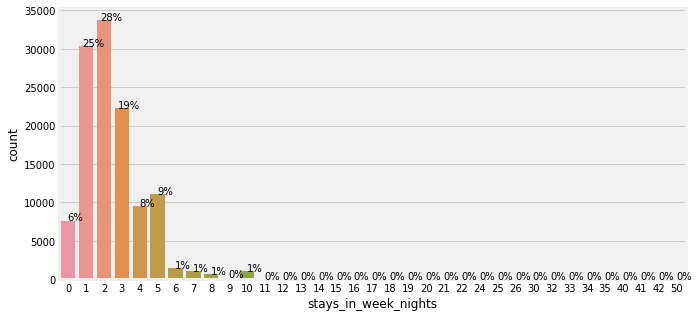

In [837]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['stays_in_week_nights'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 9. adults
Variabel adults berisi jumlah orang dewasa yang menginap di hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



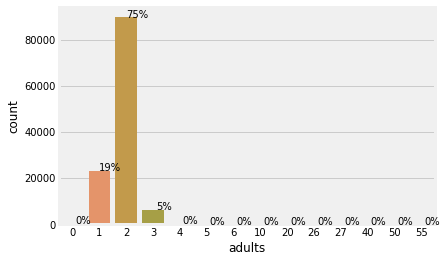

In [838]:
ax = sns.countplot(df['adults'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 10. children
Variabel children berisi jumlah ana-anak yang menginap di hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



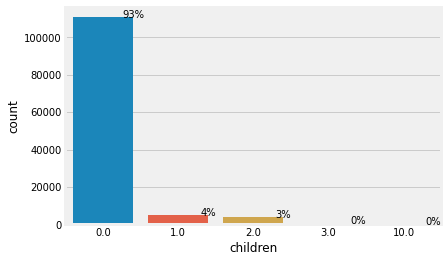

In [839]:
ax = sns.countplot(df['children'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 11. babies
Variabel babies berisi jumlah bayi yang menginap di hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



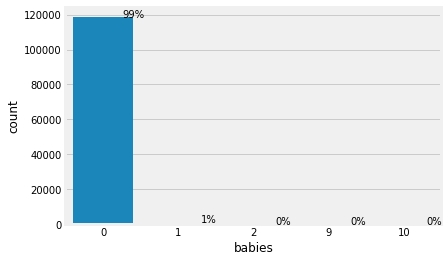

In [840]:
ax =sns.countplot(df['babies'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 12. meal
Variabel meal berisi jenis sarapan yang disediakan hotel, yaitu: 
1. BB : sarapan
2. FB : sarapan, makan siang dan makan malam
3. HB : sarapan dan makan malam
4. SC : tidak ada makanan
5. Undefined : tidak ada makanan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



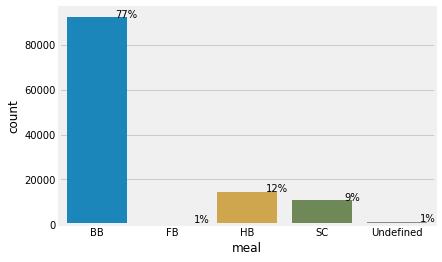

In [841]:
ax = sns.countplot(df['meal'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 13. country
Variabel yang berisini nama-nama negara asal customer

In [842]:
df['country'].value_counts().head()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [843]:
df['country'].value_counts().tail()

BDI    1
CYM    1
ASM    1
HND    1
VGB    1
Name: country, dtype: int64

## 14. market_segment
Variabel market_segment berisi segment pasar hotel, yang terdiri dari :
1. Direct : segmen pasar pembelian langsung 
2. Corporate : segmen pasar korporasi
3. Online TA : segmen pasar pemesanan online melalui travel agent
4. Offline TA : segmen pasar pemesanan offline melalui travel agent
5. Complementary : segmen pasar pemesanan komplementer
6. Groups : segmen pasar berkelompok

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



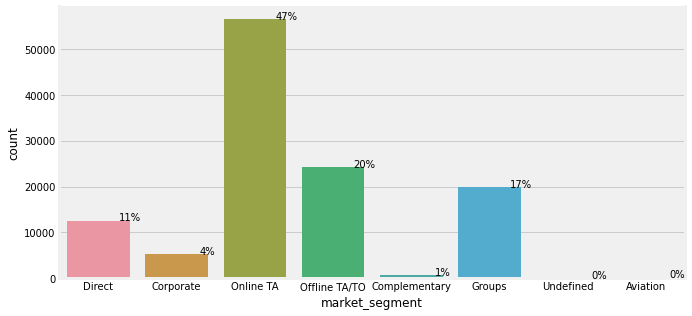

In [844]:
plt.figure(figsize=(10,5))
ax =sns.countplot(df['market_segment'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 15. distribution_channel
Variabel distribution_channel berisi kanal distribusi pasar.
1. Direct : Pemesaran secara langsung
2. Corporate : Pemesanan melalui korporasi
3. TA/TO : Pemesanan melalui Travel Agent atau Tour Operators
4. Undefined : Pemesanan diluar ketiga kanal sebelumnya.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



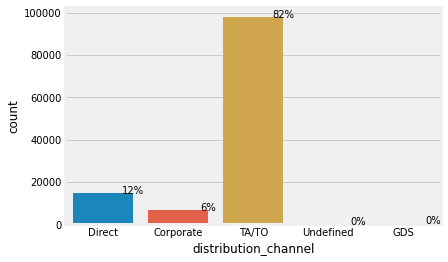

In [845]:
ax = sns.countplot(df['distribution_channel'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 16. is_repeated_guest
Variabel is_repeated_guest berisi nilai apakah pelanggan adalah tamu yang pernah menginap sebelumnya atau tidak. 0 untuk pelanggan baru, 1 untuk pelanggan yang sudah pernah menginap.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



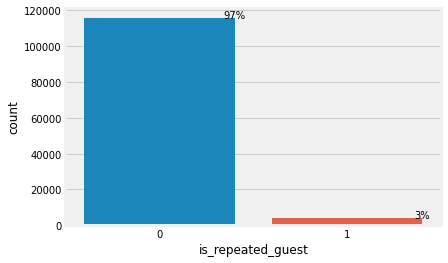

In [846]:
ax = sns.countplot(df['is_repeated_guest'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [847]:
print("Pelanggan yang pernah menginap : {} %".format(len(df[df['is_repeated_guest']==1])/len(df)*100))
print("Pelanggan belum pernah menginap : {} %".format(len(df[df['is_repeated_guest']==0])/len(df)*100))

Pelanggan yang pernah menginap : 3.191222045397437 %
Pelanggan belum pernah menginap : 96.80877795460256 %


## 17. previous_cancellations
Variabel previous_cancellations berisi nilai berapa kali pelanggan melalukan cancel booking sebelum pemesanan hari ini.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



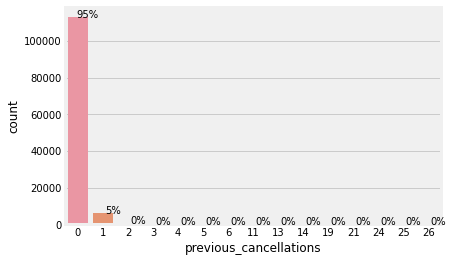

In [848]:
ax = sns.countplot(df['previous_cancellations'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 18. previous_bookings_not_canceled
Variabel previous_bookings_not_canceled berisi nilai berapa kali pelanggan tidak melalukan cancel booking sebelum pemesanan hari ini.

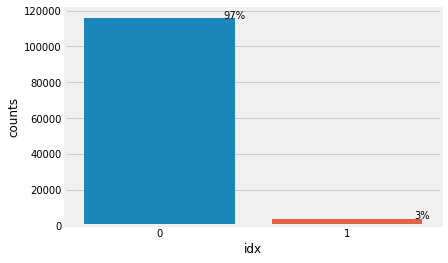

In [849]:
df_prev_book = pd.DataFrame({
    'idx':[0,1],
    'counts':[df['previous_bookings_not_canceled'].value_counts().iloc[:1].sum(),df['previous_bookings_not_canceled'].value_counts().iloc[1:].sum()]
})
df_prev_book
ax = sns.barplot(x=df_prev_book['idx'],y=df_prev_book['counts'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 19. reserved_room_type
Variabel reserved_room_type berisi tipe-tipe ruangan hotel yang dipesan. Tipe-tipe raungan hotel terdiri dari tipe C, A, D, E, G, F, H L, P. Tidak ada keterangan lebih lanjut mengenai perbedaan tipe ruangan tersebut.
<br>
**Kebanyakan pelanggan memesan ruangan tipe A**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



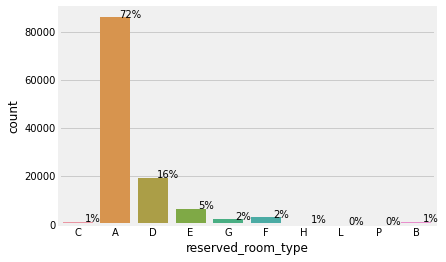

In [850]:
ax = sns.countplot(df['reserved_room_type'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 20. assigned_room_type
Variabel assigned_room_type berisi tipe-tipe ruangan hotel yang diberikan. Tipe-tipe raungan hotel terdiri dari tipe C, A, D, E, G, F, H L, P. Tidak ada keterangan lebih lanjut mengenai perbedaan tipe ruangan tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



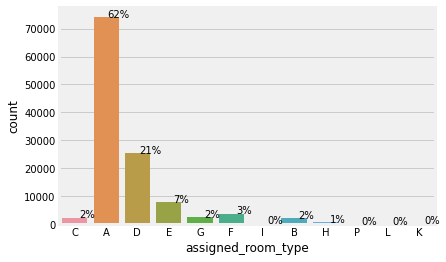

In [851]:
ax = sns.countplot(df['assigned_room_type'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 21. booking_changes
Variabel booking_changes berisi berapa kali perubahan booking. Lebih dari 80% pelanggan tidak melakukan perubahan booking.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



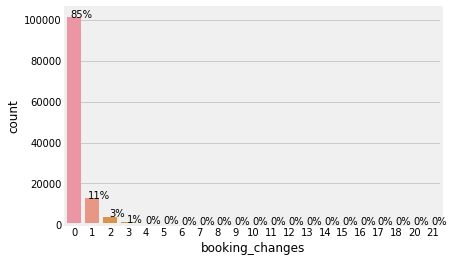

In [852]:
ax = sns.countplot(df['booking_changes'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 22. deposit_type
Variabel deposit_type berisi tipe-tipe deposit pembayaran hotel. Tipe-tipe tersebut antara lain:
1. No Deposit : Tidak menggunakan deposit.
2. Refundable : Deposit bisa direfund apabila membatalkan booking.
3. Non-Refund : Deposit tidak bisa direfund apabila membatalkan booking.

**Sebanyak lebih dari 90% pembayaran tidak menggunakan deposit.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



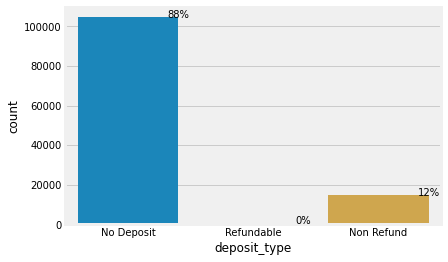

In [853]:
ax = sns.countplot(df['deposit_type'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [854]:
print("Tidak ada perubahan booking : {} %".format(len(df[df['deposit_type']=='No Deposit'])/len(df)*100))
print("Ada perubahan booking : {} %".format(len(df[df['deposit_type']=='Refundable'])/len(df)*100))

Tidak ada perubahan booking : 87.64636904263338 %
Ada perubahan booking : 0.1356897562609934 %


## 23. agent
Variabel agent berisi kumpulan ID agent yang digunakan pelanggan untuk proses pemesanan hotel.

In [855]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

## 24. company
Variabel company berisi kumpulan perusahaan yang memesan hotel.

## 25. days_in_waiting_list
Jumlah hari bookingan tsb dalam waiting list sebelum dikonfirmasi ke tamu.

**Sebanyak 98% dari total pesanan hotel tidak perlu waiting list**

In [856]:
print("Tidak waiting list : {} %".format(len(df[df['days_in_waiting_list']==0])/len(df)*100))
print("Waiting list : {} %".format(len(df[df['days_in_waiting_list']!=0])/len(df)*100))

Tidak waiting list : 96.90258815646202 %
Waiting list : 3.097411843537985 %


## 26. customer_type
variabel customer_type adalah tipe-tipe customer yang memesan hotel.
Tipe-tipe customer antaralain :
1. Trasient : Individu memesan kamar dalam jangka waktu pendek
2. Contract : Pelanggan yang memesan hotel dengan perjanjian tertentu
3. Trasient Party : Individu yang memesan dalam jangka waktu pendek namun berasosiasi sama bookingan lain (group)
4. Group : Pelanggan dalam sekelompok memesan kamar.

**Sebagian besar pelanggan bertipe Trasient, yang berarti pelanggan hanya memesan kamar dalam jangka waktu pendek**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



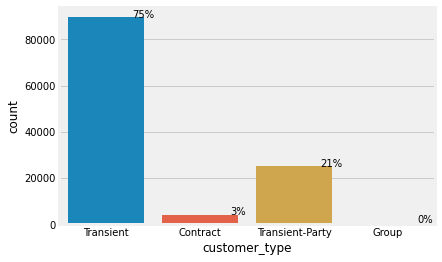

In [857]:
ax = sns.countplot(df['customer_type'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 27. adr
variabel adr (average daily rate) adalah jumlah total transaksi / jumlah hari menginap. <br>
**Adr paling besar adalah 450 Euro dan paling kecil adalah 0 Euro. Variasi nilai adr paling sering dikisaran 55-135 Euro**

In [858]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



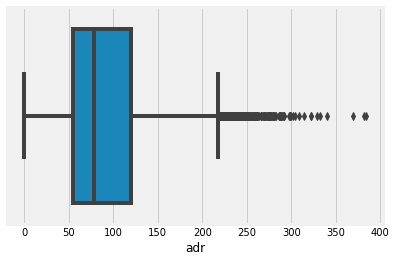

In [859]:
sns.boxplot(df['adr'].iloc[:10000])

## 28. required_car_parking_spaces
variabel required_car_parking_spaces adalah jumlah parkir mobil yang direquest oleh tamu.

**Sebanyak lebih dari 94% pemesan hotel tidak memiliki request untuk parkir mobil.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



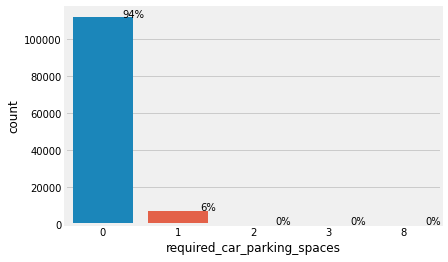

In [860]:
ax = sns.countplot(df['required_car_parking_spaces'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 29. total_of_special_requests
variabel total_of_special_requests adalah Jumlah special request oleh tamu.<br>

**Sebagian besar pelanggan tidak memiliki special request, yaitu 64% dai total pemesanan hotel.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



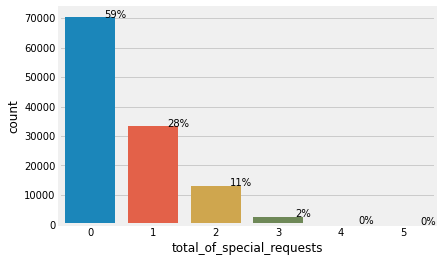

In [861]:
ax = sns.countplot(df['total_of_special_requests'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 30. reservation_status
variabel reservation_status adalah status terakhir reservasi.<br>



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



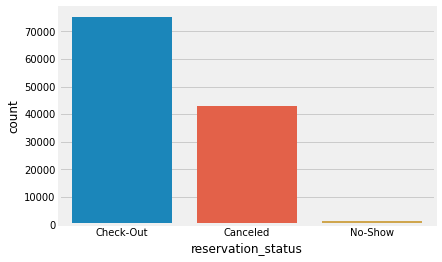

In [862]:
sns.countplot(df['reservation_status'])

## 31. Reservation_status_date 
variabel reservation_status_date  adalah tanggal dari status terakhir reservasi. Menunjukkan waktu kapan bookingan dicancel / tamu check in check out.<br>

**Waktu paling lama adalah 737 hari dan paling cepat 0 hari**

In [863]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

## 32. Lead_time 
variabel lead_time adalah selisih hari antara tanggal booking dengan tanggal check in. <br>




In [864]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

# Exploratory Data Analysis (EDA)

Dalam tahapan EDA, ada beberapa hal penting yang akan dieksplor yaitu:
1. Relasi tiap variabel dengan target variabel 
2. Data Description
3. Dari mana saja customer datang
4. Bulan dan tahun apa biasa banyak customer
5. Berapa lama customer menginap
6. Perbandingan cancel booking city dan resort
7. Check Imbalance

## 1. Relasi tiap variabel dengan target variabel

### 1. Hotel and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



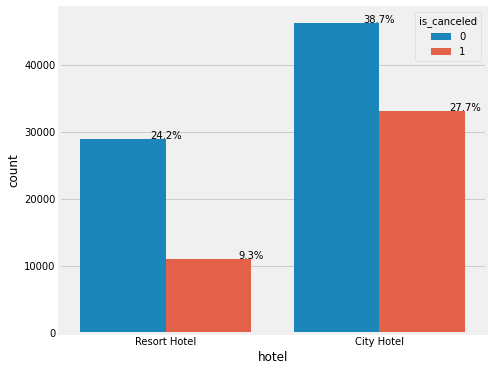

In [865]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
ax = sns.countplot('hotel', hue = df['is_canceled'], data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Berdasarkan plot, dapat dilihat bahwa city hotel lebih memiliki tingkat cancelation yang lebih tinggi.

### 2. Lead_time and is_canceled

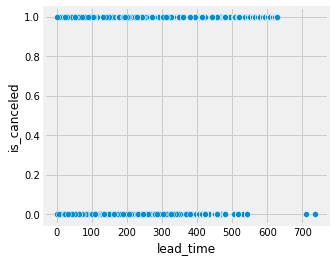

In [866]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df['lead_time'], y=df['is_canceled'])

**Berdasarkan plot bisa kita lihat bahwa tidak ada korelasi antara lead_time dengan adanya cancelation atau tidak.**

### 3. Arrival_date_year and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



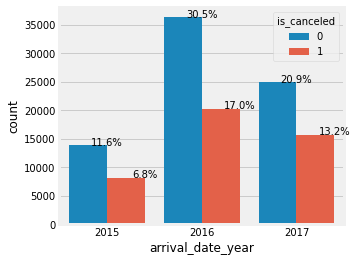

In [867]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['arrival_date_year'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan plot bisa dilihat bahwa, pada tahun 2017 terjadi penurunan tamu hotel dengan tingkat cancelation yang lebih tinggi.**

### 4. Arrival_date_month  and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



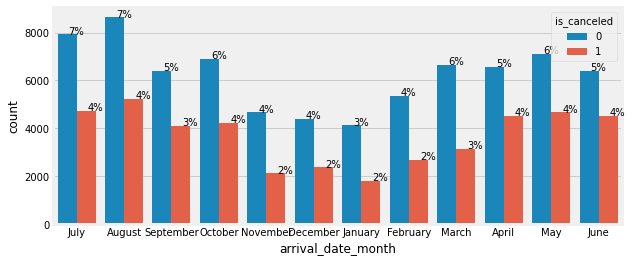

In [868]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['arrival_date_month'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan plot, bisa dilihat bahwa jumlah pengunjung terbanyak terjadi pada bulan july - agustus.**

### 5. Arrival_date_week_number and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



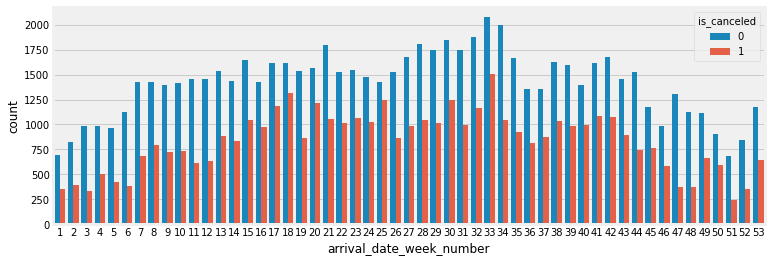

In [869]:
plt.figure(figsize = (25,4))
plt.subplot(1,2,1)
sns.countplot(df['arrival_date_week_number'], hue = df['is_canceled'])

**angka pengunjung relatif sama tiap minggunya, angka cancel booking cenderung seimbang mengikuti jumlah loan booking.**

### 6. arrival_date_day_of_month and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



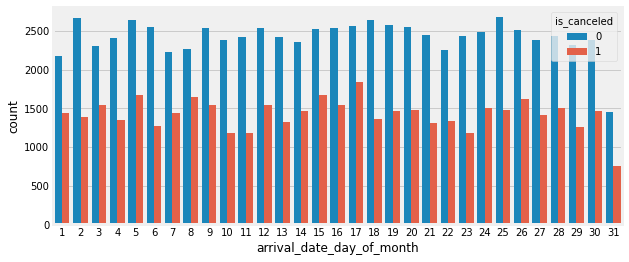

In [870]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.countplot(df['arrival_date_day_of_month'], hue = df['is_canceled'])

**angka pengunjung relatif sama per harinya**

### 7. Stays_in_weekend_nights and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



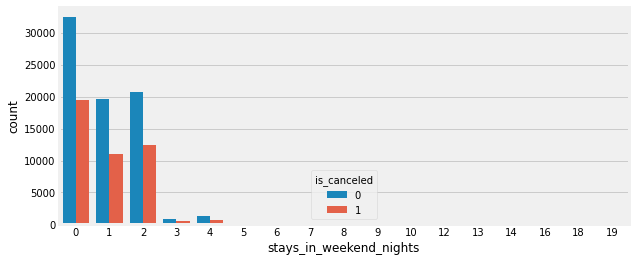

In [871]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.countplot(df['stays_in_weekend_nights'], hue = df['is_canceled'])

**Berdasarkan plot, dapat dilihat bahwa kebanyakan pengunjung tidak melakukan booking pada saat weekend.**

### 8. Stays_in_week_nights and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



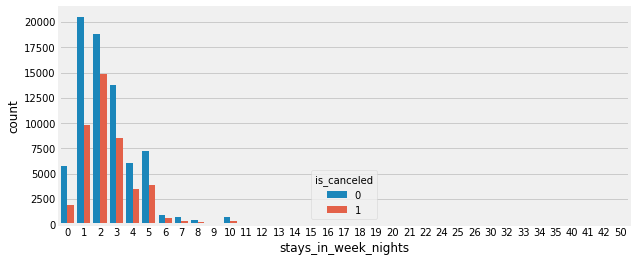

In [872]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.countplot(df['stays_in_week_nights'], hue = df['is_canceled'])

### 9. Adults and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



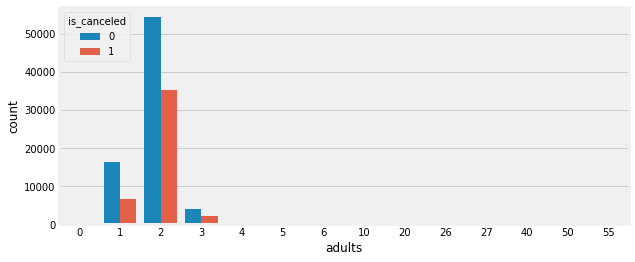

In [873]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.countplot(df['adults'], hue = df['is_canceled'])

**Mayoritas pengunjung orang dewasa datang berdua.**

### 10. Children and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



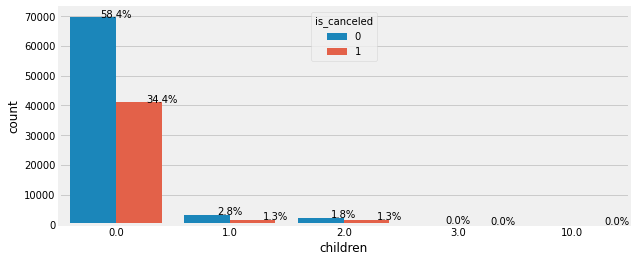

In [874]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['children'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### 11. Babies and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



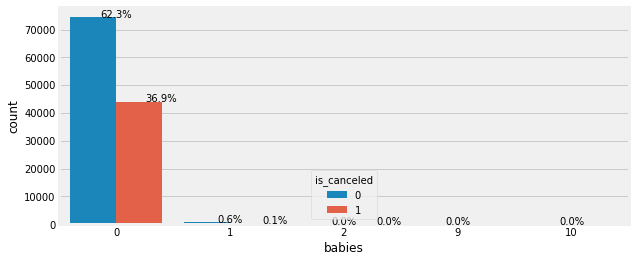

In [875]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['babies'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### 12. Meal and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



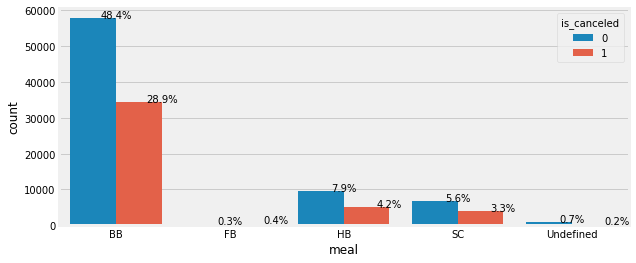

In [876]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['meal'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan plot, dapat dilihat bahwa kebanyakan pengunjung memilih tipe meal "BB"**

### 13. Country and is_canceled

In [877]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BDI        1
CYM        1
ASM        1
HND        1
VGB        1
Name: country, Length: 177, dtype: int64

**Berdasarkan plot, dapat dilihat bahwa kebanyakan pengunjung berasal dari negara PRT, GBR, dan FRA.**

### 14. Market_segment and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



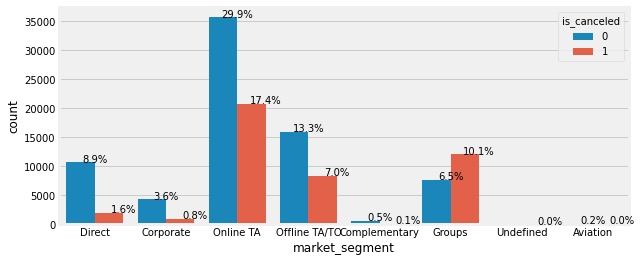

In [878]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['market_segment'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan data, dapat dilihat bahwa kebanyakan pengunjung berasal dari segmentasi online travel agent.**

### 15. Distribution_channel and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



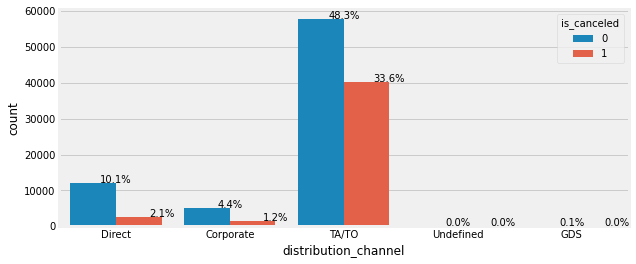

In [879]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['distribution_channel'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### 16. Is_repeate_guest and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



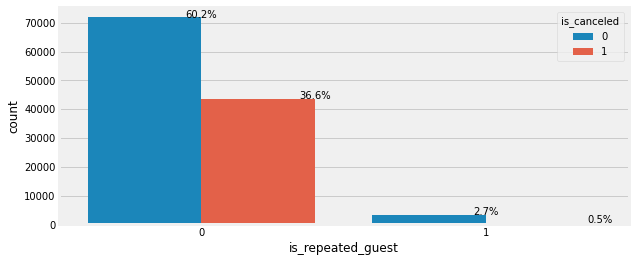

In [880]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['is_repeated_guest'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan data, ternyata pengunjung hotel kebanyakan bukan merupakan repeated_guest atau kembanyakan pengunjung baru.**

### 17. Previous_cancellations and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



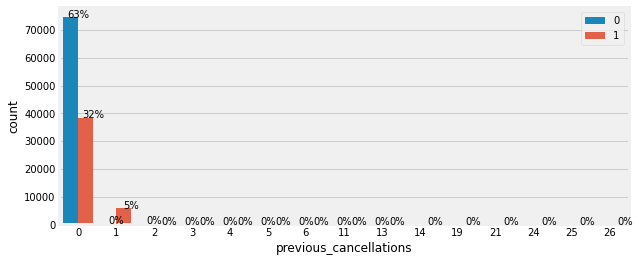

In [881]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['previous_cancellations'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(loc='upper right')
plt.show()

**kebanyakan pengunjung tidak melakukan pembatalan sebelumnya. Meninjau dari diagram sebelumnya, mayoritas pengunjung baru pertama kali menginap.**

### 19. Reserved_room_type and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



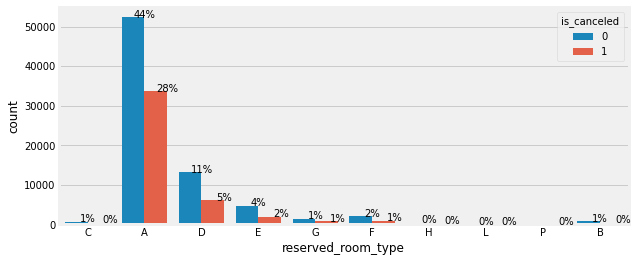

In [882]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['reserved_room_type'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Kebanyakan pengunjung memesan ruangan tipe A**

### 20. Assigned_room_type and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



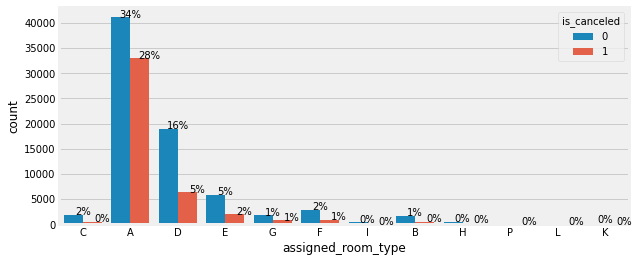

In [883]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['assigned_room_type'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**kamar A mendominasi pemberian kepada pelanggan**

In [884]:
df_room = df[['reserved_room_type','assigned_room_type','is_canceled']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



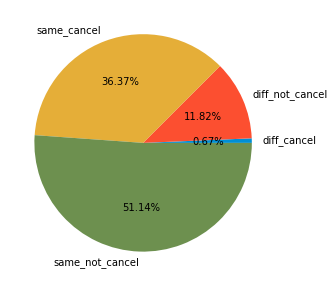

In [885]:
df_imbalance = pd.DataFrame({
    'diff_cancel':[len(df_room[(df_room['reserved_room_type']!=df_room['assigned_room_type']) & (df_room['is_canceled']==1)])/len(df)],
    'diff_not_cancel':[len(df_room[(df_room['reserved_room_type']!=df_room['assigned_room_type']) & (df_room['is_canceled']==0)])/len(df)],
    'same_cancel':[len(df_room[(df_room['reserved_room_type']==df_room['assigned_room_type']) & (df_room['is_canceled']==1)])/len(df)],
    'same_not_cancel':[len(df_room[(df_room['reserved_room_type']==df_room['assigned_room_type']) & (df_room['is_canceled']==0)])/len(df)]
})
plt.figure(figsize=(10,5))
plt.pie(df_imbalance, labels=['diff_cancel','diff_not_cancel','same_cancel','same_not_cancel'],autopct='%.2f%%')
plt.show()

**hanya kurang dari 1% pelanggan yang membatalkan pesanan karena kamar yang dipesan tidak sama dengan kamar yang didapat.**

### 21. Booking_changes and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



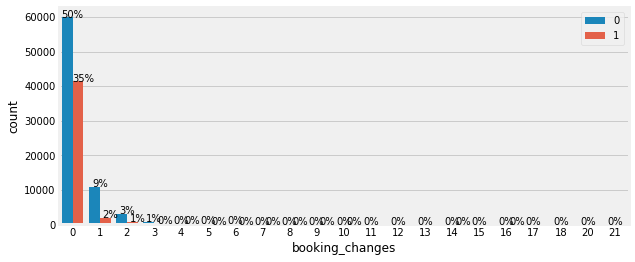

In [886]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['booking_changes'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(loc='upper right')
plt.show()

**pelanggan yang tidak melakukan perubahan booking lebih besar kemungkinan untuk cancel booking**

### 22. Deposit_type and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



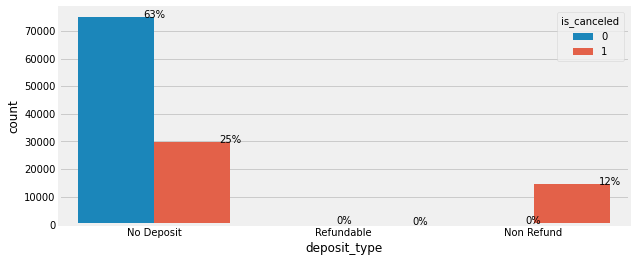

In [887]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['deposit_type'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan data, dapat dilihat bahwa kebanyakan customer memiliki deposit type "no deposit" dan "non refund".**

### 23. Customer_type and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



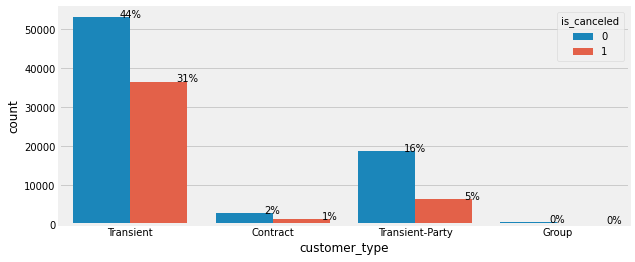

In [888]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['customer_type'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan data, dapat dilihat bahwa kebanyakan pengunjung hanya stay sebentar saja (transient)**

### 24. ADR and is_canceled

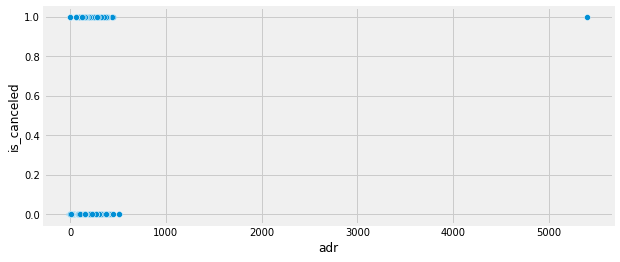

In [889]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df['adr'],y=df['is_canceled'])

berdasarkan 

### 25. Required_car_parking_space and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



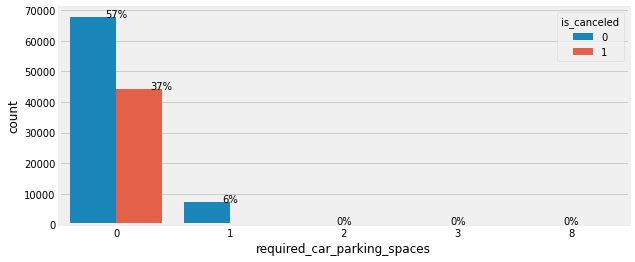

In [890]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['required_car_parking_spaces'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Berdasarkan data, dapat dilihat bahwa kebanyakan pengunjung tidak memerlukan car parking space.**

### 26. Total_of_special_requests and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



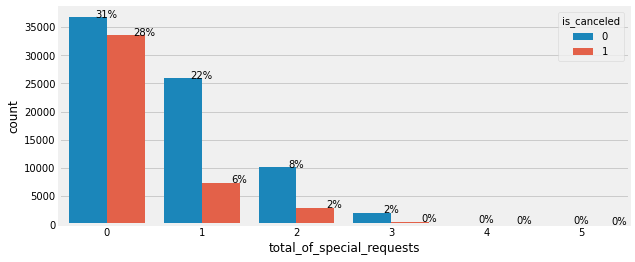

In [891]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['total_of_special_requests'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**pelanggan yang tidak memiliki special request cenderung lebih besar kemungkinan untuk membatalkan booking**

### 27. Reservation_status and is_canceled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



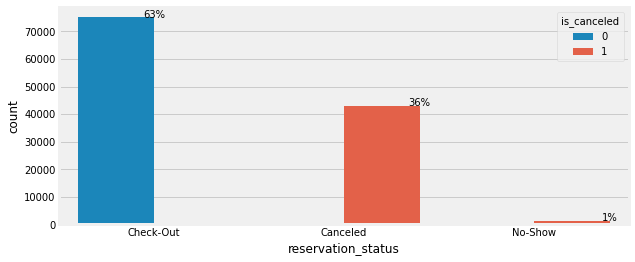

In [892]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
ax = sns.countplot(df['reservation_status'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**status terakhir reservasi dari data yang disediakan menunjukkan 63% pelanggan sudah selesai transaksi dan checkout**

## 2. Data Description

Mari kita lihat feature, tipe data, dan jumlah missing value pada data kita.

In [893]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].unique()[:5])])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', '%null', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,%null,unique,uniqueSample
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November]"
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40]"


In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [895]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Check NA

In [896]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Numerical Correlation

In [897]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [898]:
cat = [col for col in df.columns if (df[col].dtype == 'O')][:11]
df[cat]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


### Categorical Correlation

**Menghitung relasi variabel kategorik dengan variabel is_canceled menggunakan chi2**

In [899]:
df_cat = pd.DataFrame(columns=[cat])
for i in cat:
  data = pd.crosstab(df[i],df['is_canceled'])
  stat,p,dof,expected = chi2_contingency(data)
  print(i+" = "+str(p))

hotel = 0.0
arrival_date_month = 3.671822609327152e-119
meal = 1.3212351959124216e-64
country = 0.0
market_segment = 0.0
distribution_channel = 0.0
reserved_room_type = 1.121956218424043e-133
assigned_room_type = 0.0
deposit_type = 0.0
customer_type = 0.0
reservation_status = 0.0


In [900]:
 num = [col for col in df.columns if df[col].dtype != 'O']
 df[num].drop(['agent','company'], axis='columns')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [901]:
 df[num].corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [902]:
 df[num].drop(['agent','company'], axis='columns').corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


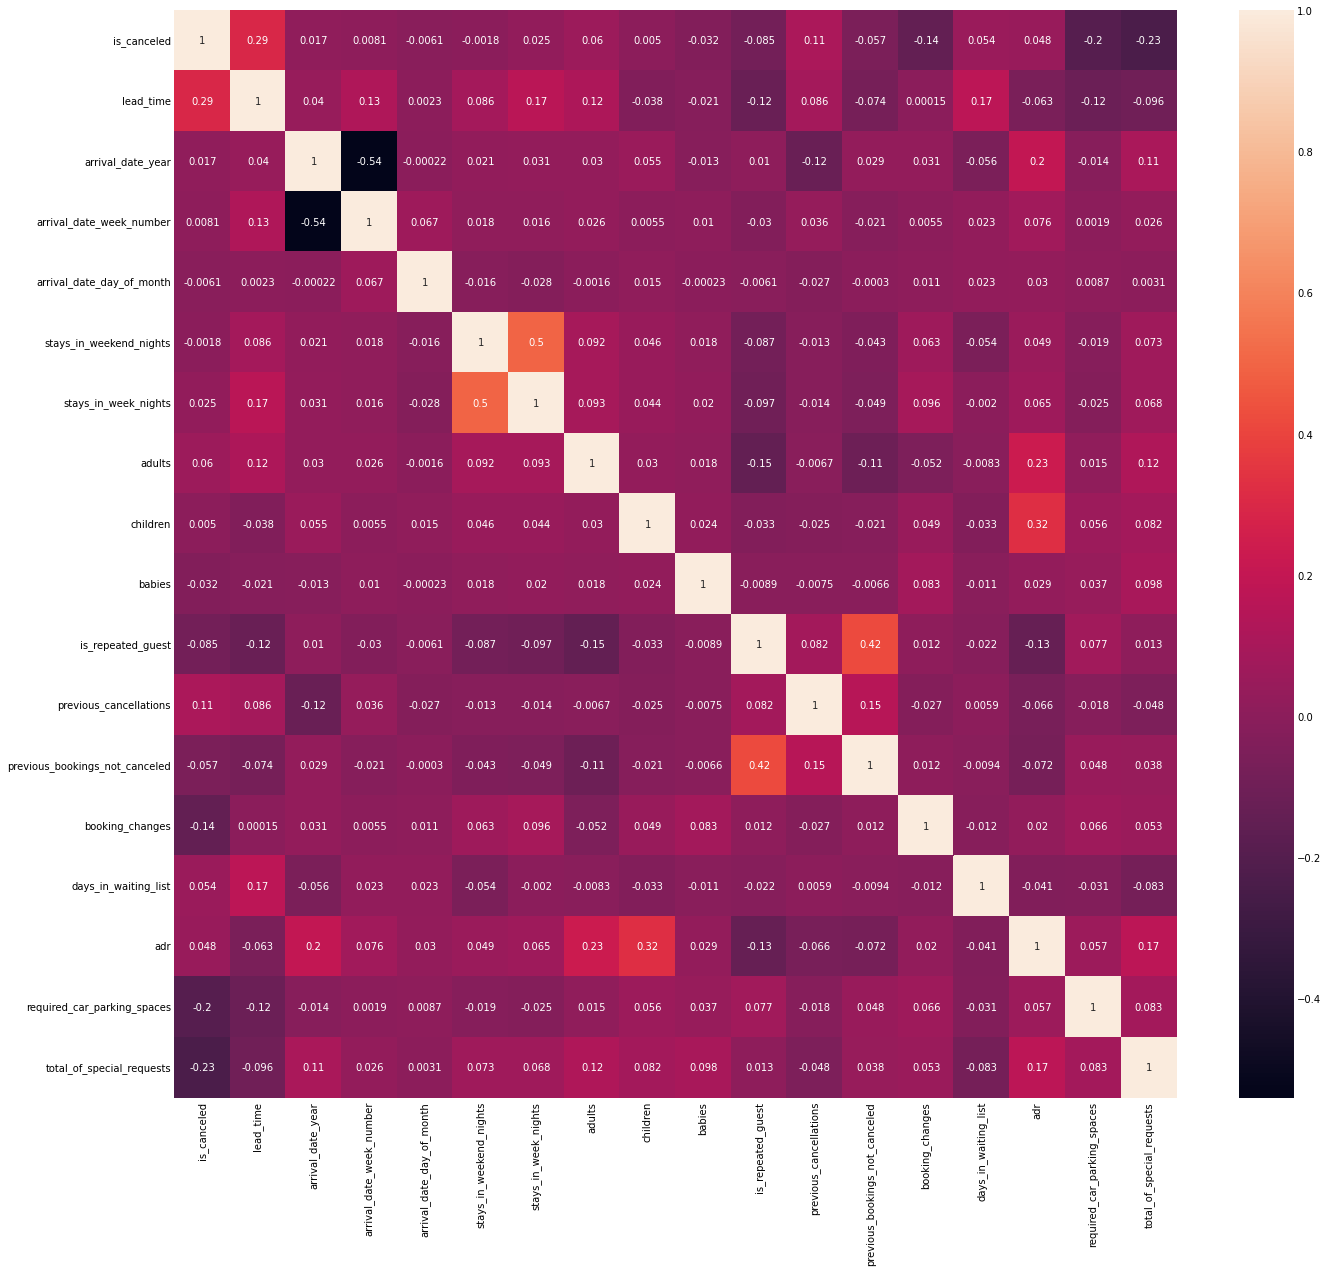

In [903]:
 plt.figure(figsize=(20,20))
 sns.heatmap(df[num].drop(['agent','company'], axis='columns').corr(), annot=True)

## 3. Negara asal paling banyak

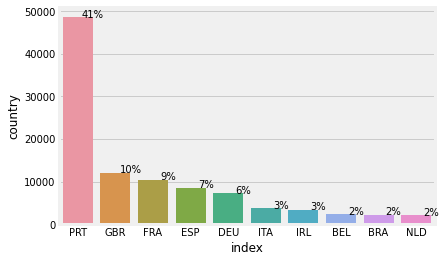

In [904]:
df_negara = pd.DataFrame(df['country'].value_counts().reset_index()).head(10)
ax = sns.barplot(x=df_negara['index'], y=df_negara['country'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [905]:
df['country'].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Dapat dilihat bahwa pengunjung hotel berasal dari negara portugal dengan lokasi hotel juga berada di portugal.

## 4. Bulan dan Tahun berapa yang sibuk

In [906]:
df_arrival_month_year = pd.DataFrame(df[['arrival_date_month','arrival_date_year']].value_counts().reset_index())
df_arrival_month_year.columns = ['Month','Year','Count']

# data resort
df_resort = df[df['hotel']=='Resort Hotel']
df_resort = pd.DataFrame(df_resort[['arrival_date_month','arrival_date_year']].value_counts().reset_index())
df_resort.columns = ['Month','Year','Count_Resort']
d = {
    'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12
}
df_resort.Month = df_resort.Month.map(d)
df_resort['Date'] = pd.to_datetime(df_resort[['Year', 'Month']].assign(DAY=1))
df_resort.drop(['Month','Year'], axis='columns', inplace=True)
df_resort.sort_values('Date')

# data city
df_city = df[df['hotel']=='City Hotel']
df_city = pd.DataFrame(df_city[['arrival_date_month','arrival_date_year']].value_counts().reset_index())
df_city.columns = ['Month','Year','Count_City']
d = {
    'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12
}

df_city.Month = df_city.Month.map(d)
df_city['Date'] = pd.to_datetime(df_city[['Year', 'Month']].assign(DAY=1))
df_city.drop(['Month','Year'], axis='columns', inplace=True)

# Merge
df_final = df_city.merge(df_resort, on='Date')

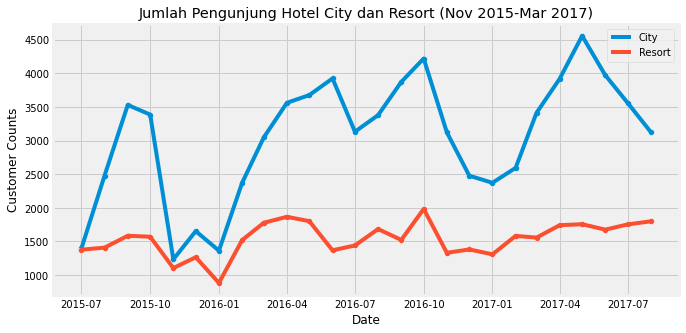

In [907]:
plt.figure(figsize=(10,5))
plt.title('Jumlah Pengunjung Hotel City dan Resort (Nov 2015-Mar 2017)')
sns.lineplot( x = df_final['Date'], y = df_final['Count_City'])
sns.lineplot( x = df_final['Date'], y = df_final['Count_Resort'])
sns.scatterplot( x = df_final['Date'], y = df_final['Count_City'])
sns.scatterplot( x = df_final['Date'], y = df_final['Count_Resort'])
plt.ylabel('Customer Counts')
plt.xlabel('Date')
plt.legend(['City','Resort'])

Berikut ini adalah acara yang terjadi pada saat terjadi peningkatan jumlah tamu di city hotel (lisbon).
1. LISB-ON Festival (September 2015)
2. The 8th International Conference on Quality of Multimedia Experience (QoMEX 2016) (Juni 2016)
3. French Film Festival (Oktober 2016)
4. Challenge Lisboa (Mei 2017)
5. Lisbon Investment Summit (Juni 2017)

Berikut ini adalah acara yang terjadi pada saat terjadi peningkatan jumlah tamu di resort hotel (algarve)
1. Festival of International Music (FIMA) (April 2016)
2. Festa de Alcoutim (September)
3. Algarve Classic Festival (October 2016)

## 5. Berapa lama kebanyakan customer menginap

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



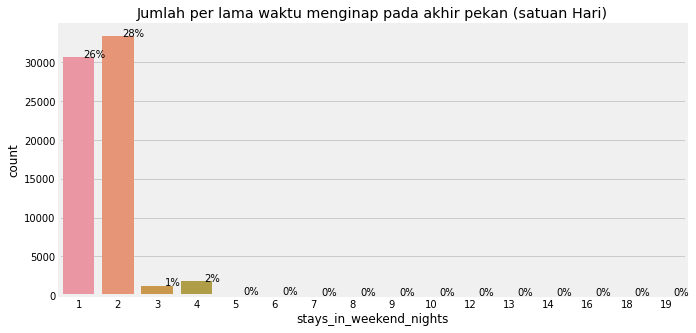

In [908]:
plt.figure(figsize=(10,5))
df_stays =df[['stays_in_weekend_nights','stays_in_week_nights']]
df_stays[(df_stays['stays_in_weekend_nights']!=0) | (df_stays['stays_in_week_nights']!=0)]
plt.title('Jumlah per lama waktu menginap pada akhir pekan (satuan Hari)')
ax = sns.countplot(df_stays[(df_stays['stays_in_weekend_nights']!=0)]['stays_in_weekend_nights'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



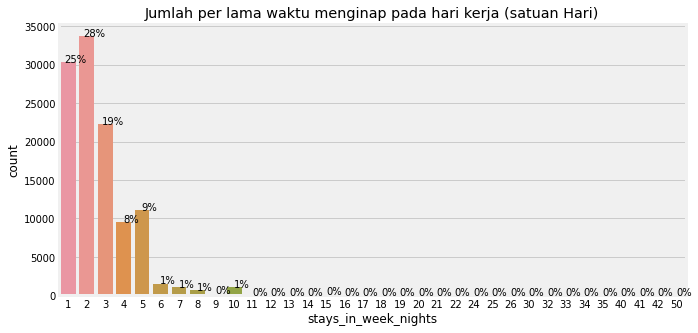

In [909]:
plt.figure(figsize=(10,5))
df_stays =df[['stays_in_weekend_nights','stays_in_week_nights']]
df_stays[(df_stays['stays_in_weekend_nights']!=0) | (df_stays['stays_in_week_nights']!=0)]
plt.title('Jumlah per lama waktu menginap pada hari kerja (satuan Hari)')
ax = sns.countplot(df_stays[(df_stays['stays_in_week_nights']!=0)]['stays_in_week_nights'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [910]:
df_stays[(df_stays['stays_in_week_nights']!=0)]['stays_in_week_nights'].median()

2.0

In [911]:
df_stays

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2
...,...,...
119385,2,5
119386,2,5
119387,2,5
119388,2,5


## 6. Lebih banyak orang yang cancel booking di hotel perkotaan

**Berdasarkan plot tersebut, dapat dilihat bahwa tingkat cancel customer lebih tinggi terjadi pada city hotel.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



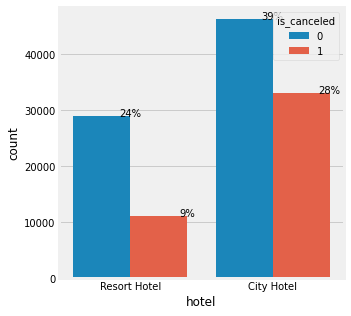

In [912]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.countplot(df['hotel'], hue = df['is_canceled'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 7. Check Imbalance

In [913]:
df_imbalance = pd.DataFrame({
    'not_cancel':[len(df[df['is_canceled']==0])/len(df)],
    'cancel':[len(df[df['is_canceled']==1])/len(df)]
})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



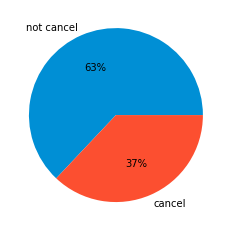

In [914]:
plt.pie(df_imbalance, labels=['not cancel','cancel'],autopct='%.0f%%')
plt.show()

# Insight

Berdasarkan proses understanding data kemudian EDA, ada insight yang bisa didapatkan. 

Kenaikan jumlah pelanggan di city hotel bertepatan dengan diadakannya sebuah event besar yang biasanya diadakan selama 2-3 hari di kota lisbon seperti konser musik, konferensi investasi, festival musik, dll. Hal ini juga terjadi di resort hotel walaupun tidak setinggi city hotel peningkatan jumlah pengunjungnya.

Hal ini didukung dengan beberapa data yang ada seperti tipe customer dan proporsi jumlah adults, children, dan babies yang datang ke hotel. 

1. Tipe customer yang datang adalah transient dengan rata-rata lama menginap sekitar 2-3 hari. 
2. Kebanyakan customer juga tidak membawa anak-anak dan bayi. Hal ini dapat dikarenakan acara yang diadakan di kota lisbon lebih diperuntukkan untuk orang dewasa. 
3. Customer juga kebanyakan hanya memesan kamar hanya dengan sarapan pagi. Hal ini dapat dikarenakan acara yang dilakukan pada siang atau malam hari sehingga pelanggan tidak makan di hotel.

Selain itu, ada juga insight lain seperti kebanyakan pelanggan hotel berasal dari negara Portugal yang berarti pelanggan hotel juga merupakan wisatawan lokal.
Kebanyakan pelanggan tidak memerlukan mobil dapat dikarenakan tempat acara yang dekat dengan hotel atau memang di kota tersebut transportasi umum sudah sangat memadai sehingga pengunjung lebih memilih untuk naik transportasi umum.


# Data Cleaning

Berdasarkan proses understanding data dan EDA, ada beberapa hal yang harus dilakukan sebelum membuat model machine learning, yaitu:

a. Mengisi variabel yang memiliki missing value dengan pendekatan sebagai berikut:
1. Children : Median (Distribution not Normal)
2. Country : Modus
3. Agent : drop
4. Company : drop

b. Hapus data yang memiliki value adults=0 dan babies=0 dan children =0

c. Mengubah value undefined pada kolom meal menjadi SC


## Children

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



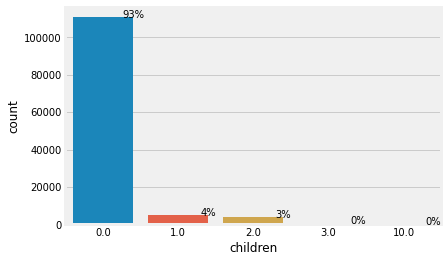

In [915]:
ax = sns.countplot(df['children'])
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [916]:
df['children'] = df['children'].fillna(df['children'].median()).astype('int64')

## Country

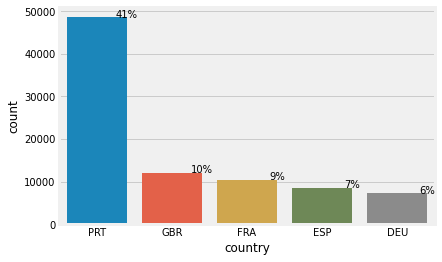

In [917]:
ax = sns.countplot(x="country", data=df, order=df.country.value_counts().iloc[:5].index)
total = len(df)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [918]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

## Company & Agent

In [919]:
df = df.drop(columns=['company', 'agent','reservation_status_date'])

## Drop beberapa row

In [920]:
idx = df[(df['adults']==0)&(df['children']==0)&(df['babies']==0)].index
df.drop(idx, inplace=True)

## Meal

In [921]:
df['meal'] = df['meal'].replace(['Undefined'],'SC')

## Data description after cleaning

In [922]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].unique()[:5])])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', '%null', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,%null,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.0,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.0,12,"[July, August, September, October, November]"
5,arrival_date_week_number,int64,0,0.0,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,0,0.0,33,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.0,14,"[2, 1, 3, 4, 40]"


# Feature Engineering

Membuat kolom baru berdasarkan penjumlahan adult, children, dan babies kemudian dinamai family_size_grouped

In [923]:
df['family_size'] = df['adults'] + df['children'] + df['babies']
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 10: 'Large', 12: 'Large', \
              20: 'Large', 26: 'Large', 27: 'Large', 40: 'Large',50: 'Large', 55: 'Large'}
df['family_size_grouped'] = df['family_size'].map(family_map)
df['family_size_grouped'].head()

df.drop(['family_size','adults','children','babies'],inplace=True, axis=1)
df['family_size_grouped'].head()

0    Small
1    Small
2    Alone
3    Alone
4    Small
Name: family_size_grouped, dtype: object

In [924]:
df['family_size_grouped'].value_counts()

Small     96475
Alone     22581
Medium      138
Large        16
Name: family_size_grouped, dtype: int64

In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   meal                            119210 non-null  object 
 10  country                         119210 non-null  object 
 11  market_segment                  119210 non-null  object 
 12  distribution_cha

# Data Splitting

In [926]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [927]:
df_10 = df[['is_canceled','hotel','meal','deposit_type','customer_type','family_size_grouped','lead_time',
            'previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests']]

In [928]:
df_10.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,0.087191,0.218799,0.062553,0.571504
std,0.483012,106.875450,0.844918,0.638504,0.245360,0.792876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,161.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,26.000000,18.000000,8.000000,5.000000


In [929]:
X = df_10.drop(columns=['is_canceled'])
y = df_10['is_canceled']

In [930]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size = 0.3,
    random_state=2021)

In [931]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(83447, 10)
(35763, 10)
(83447,)
(35763,)


In [932]:
df_10

,is_canceled,hotel,meal,deposit_type,customer_type,family_size_grouped,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,BB,No Deposit,Transient,Small,342,0,3,0,0
1,0,Resort Hotel,BB,No Deposit,Transient,Small,737,0,4,0,0
2,0,Resort Hotel,BB,No Deposit,Transient,Alone,7,0,0,0,0
3,0,Resort Hotel,BB,No Deposit,Transient,Alone,13,0,0,0,0
4,0,Resort Hotel,BB,No Deposit,Transient,Small,14,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,City Hotel,BB,No Deposit,Transient,Small,23,0,0,0,0
119386,0,City Hotel,BB,No Deposit,Transient,Small,102,0,0,0,2
119387,0,City Hotel,BB,No Deposit,Transient,Small,34,0,0,0,4
119388,0,City Hotel,BB,No Deposit,Transient,Small,109,0,0,0,0


# Data Transformation

Preprocess:
1. Onehot Encoding : hotel, meal, deposit_type, customer_type, family_size_grouped
2. Robust Scaler : lead_time

In [933]:
transformer = ColumnTransformer([
                                 ('onehot',OneHotEncoder(drop='first'),['hotel','meal','deposit_type', 'customer_type', 'family_size_grouped']),
                                 ('robust',RobustScaler(),['lead_time'])
], remainder = 'passthrough')

In [934]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [935]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.049296,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.429577,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.345070,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.718310,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.218310,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.485915,0.0,0.0,0.0,0.0
83443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.154930,0.0,0.0,0.0,0.0
83444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.471831,0.0,1.0,0.0,3.0
83445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.049296,0.0,0.0,0.0,1.0


In [936]:
X_train_preprocessed.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000,83447.000000
mean,0.335710,0.006555,0.122569,0.098290,0.121454,0.001390,0.004829,0.749865,0.211308,0.000120,0.001162,0.808765,0.245217,0.088224,0.217995,0.062027,0.570110
std,0.472241,0.080698,0.327944,0.297708,0.326656,0.037258,0.069326,0.433093,0.408239,0.010946,0.034075,0.393276,0.750404,0.849300,0.631498,0.243531,0.790568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.485915,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.359155,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.640845,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.704225,26.000000,18.000000,8.000000,5.000000


In [937]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(83447, 10)
(35763, 10)
(83447,)
(35763,)


In [938]:
transformer.transformers_

[('onehot',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['hotel', 'meal', 'deposit_type', 'customer_type', 'family_size_grouped']),
 ('robust',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
               with_scaling=True),
  ['lead_time']),
 ('remainder', 'passthrough', [6, 7, 8, 9])]

In [939]:
X_train.head()

,hotel,meal,deposit_type,customer_type,family_size_grouped,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
63044,City Hotel,SC,No Deposit,Transient,Small,218,0,0,0,0
25686,Resort Hotel,BB,No Deposit,Transient-Party,Small,8,0,0,0,0
20645,Resort Hotel,BB,No Deposit,Transient,Small,20,0,0,1,2
116505,City Hotel,BB,No Deposit,Transient,Small,171,0,0,0,1
55487,City Hotel,BB,No Deposit,Transient,Small,38,0,0,0,0


In [940]:
features = list(transformer.transformers_[0][1].get_feature_names()) + ['lead_time','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Resort Hotel,x1_FB,x1_HB,x1_SC,x2_Non Refund,x2_Refundable,x3_Group,x3_Transient,x3_Transient-Party,x4_Large,x4_Medium,x4_Small,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.049296,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.429577,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.345070,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.718310,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.218310,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.485915,0.0,0.0,0.0,0.0
83443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.154930,0.0,0.0,0.0,0.0
83444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.471831,0.0,1.0,0.0,3.0
83445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.049296,0.0,0.0,0.0,1.0


# Modeling


In [941]:
logreg = LogisticRegression(solver='liblinear', random_state=2021)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=2021)

skfold = StratifiedKFold(n_splits=5)
logreg_cv = cross_val_score(logreg, X_train_preprocessed,y_train, cv=skfold, scoring='precision')
tree_cv = cross_val_score(tree,X_train_preprocessed,y_train, cv=skfold, scoring='precision')

In [942]:
# logreg
for i in logreg_cv:
   print(i)

0.8729248415333535
0.8570154577883472
0.8389102753923601
0.8627808136004858
0.8581730769230769


In [943]:
# tree
for i in tree_cv:
   print(i)

0.995085995085995
0.9931506849315068
0.9930521091811414
0.992603550295858
0.9955290611028316


In [944]:
logreg.fit(X_train_preprocessed, y_train)
tree.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [945]:
logreg_y_pred = logreg.predict(X_test_preprocessed)
tree_y_pred = logreg.predict(X_test_preprocessed)

## Logistic Regression Evaluation

In [946]:
print(classification_report(y_test,logreg_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     22503
           1       0.86      0.47      0.61     13260

    accuracy                           0.78     35763
   macro avg       0.81      0.71      0.73     35763
weighted avg       0.79      0.78      0.76     35763



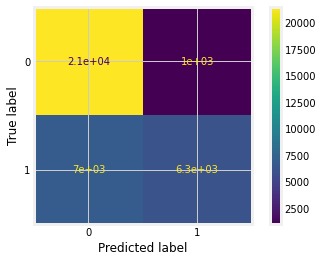

In [947]:
plot_confusion_matrix(logreg, X_test_preprocessed, y_test)

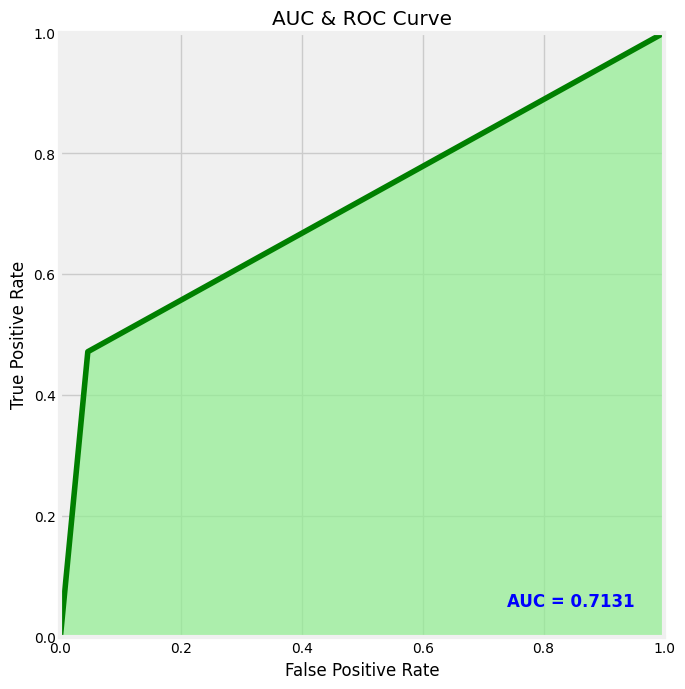

In [948]:
auc = metrics.roc_auc_score(y_test, logreg_y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Decision Tree Evaluation

In [949]:
print(classification_report(y_test,tree_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     22503
           1       0.86      0.47      0.61     13260

    accuracy                           0.78     35763
   macro avg       0.81      0.71      0.73     35763
weighted avg       0.79      0.78      0.76     35763



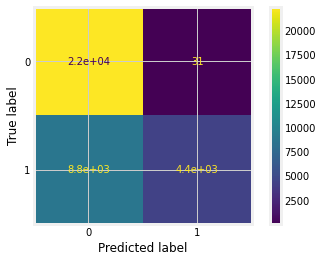

In [950]:
plot_confusion_matrix(tree, X_test_preprocessed, y_test)

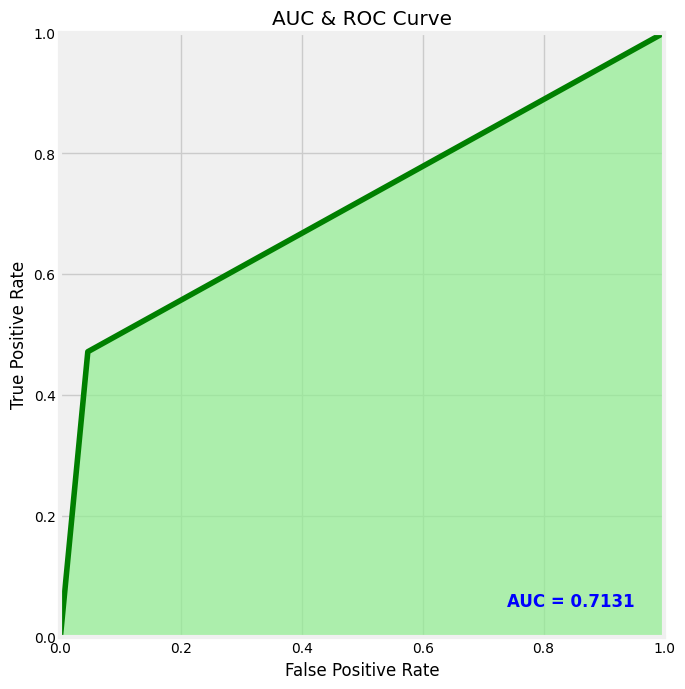

In [951]:
auc = metrics.roc_auc_score(y_test, tree_y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, tree_y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Kesimpulan dan Saran

Melalui model machine learning yang diperoleh, kita dapat menebak apakah seseorang akan cancel booking. 
<br>
**Kesimpulan:**
1. Variabel yang memengaruhi pelanggan untuk membatalkan pesanan adalah 'is_canceled','hotel','meal','deposit_type','customer_type','family_size_grouped','lead_time','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests', 'reserved_room_type','arrival_date_month'
2. Dari hasil evaluation, dengan menggunakan model decision tree kita dapat mengecilkan jumlah False Positif yang semua sekitar 2500 menjadi 31. Hal ini dapat mengurangi jumlah kerugian yang dikeluarkan oleh hotel yang akan memberikan voucher kepada pelanggan yang tidak akan cancel booking.
<br><br>

**Saran:**
1. Memberikan voucher khusus untuk pengunjung hotel yang terindikasi akan 
membatalkan booking seperti voucher makanan, transportasi, dll.
2. Berdasarkan data-data yang diperoleh, diketahui bahwa kebanyakan pengunjung hotel memesan kamar karena adanya event tertentu di kota tersebut. Untuk itu, kita dapat mengadakan event khusus apabila pada bulan-bulan tertentu tidak ada event sama sekali di kota tersebut.
3. Kita dapat bekerja sama dengan panitia acara di kota tersebut untuk melakukan acara di dekat hotel ataupun di hotel yang kita miliki jika memungkinkan sehingga dapat meningkatkan pengunjung hotel yang ingin menginap di hotel pada saat acara berlangsung.
4. Jika kebetulan venue acara cukup jauh dari hotel yang kita miliki, kita dapat memberikan service khusus berupa bus transportasi yang akan mengantarkan pengunjung hotel ke tempat acara secara gratis.
